In [5]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
import tweepy
from textblob import TextBlob
import jsonpickle
import pandas as pd
import json
from deep_translator import GoogleTranslator
#import dataframe as df
CONSUMER_KEY="n41jyoYdq96M5iJVaXTRwklHl"
CONSUMER_SECRET="5oghZuTd1AIZNcO8ZnufJ0MxRpbf45rgJZBSoWO0bWQVttgyJU"

ACCESS_KEY="1534852369317793792-LEdNJ25LsLQr8ziVAhqEYphA69KXO1"
ACCESS_SECRET="6xSGKDAS9rHgyGneCH6GN0NAEtZz4bBgHnFgTiXjGKYh7"
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAADdHdwEAAAAAPVb2tASayDMtQ82a3G2jHFGOZCY%3D38FX18FVtGNdsFYOp8l0RV2ZB4U7UumREprsMF4WVPwVcKrZ52"
auth=tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY,ACCESS_SECRET)
auth.secure=True
api=tweepy.API(auth)

In [10]:
nlp = spacy.load('en_core_web_sm')

In [43]:
import tweepy
import pandas as pd
import seaborn as sns

In [12]:
!pip install twitterscraper


  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-py3-none-any.whl size=11346 sha256=0540f920f88544dc4e8f540aa8f2658d2d1d1471032e69a521381f62c76e9118
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\a9\53\2d\af5e98fe265af4e191256f32bd89202d5db098ef5cb3c586d7
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=3813f802311b8d227396cda30f334062e7dfac8e19b3ce1ed1fdd1b37cd88ad3
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built twitterscraper bs4


In [33]:
number_of_tweets=200
tweets=[]
likes=[]
time = []
retweets=[]

for i in tweepy.Cursor(api.user_timeline, id='AmericanExpress',tweet_mode="extended").items(number_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)
    retweets.append(i.retweet_count)

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


In [34]:
df=pd.DataFrame({'tweets':tweets,'likes':likes,'retweets':retweets,'time':time})

In [35]:
df

tweets  likes  retweets  \
0    @nballetta Hi, sorry to hear you had a bad exp...      0         0   
1    @TbPardue Hi, sorry to hear this. Connecting y...      0         0   
2    U.S. Consumer Platinum Refresh: We launched ne...     16         1   
3    Streamlined Servicing: Following a commitment ...      8         0   
4    Enhanced Resolution of Merchant Disputes: Usin...      7         0   
..                                                 ...    ...       ...   
195  @davidgruning Hi David, sorry to hear this. Lo...      0         0   
196  @Kristine1021 Hi there, sorry to hear this. Co...      0         0   
197  @inrevino Hi there, bringing in @AskAmex to se...      0         0   
198  @heyliz___ A night to remember forever! So gla...      1         0   
199  RT @heyliz___: Got my @americanexpress exclusi...      0         4   

                         time  
0   2022-07-09 20:28:29+00:00  
1   2022-07-07 21:24:40+00:00  
2   2022-07-07 15:43:48+00:00  
3   2022-07-07 15:43:48+00:00  
4   2022-07-07 15:43:47+00:00  
..                        ...  
195 2022-05-22 15:53:05+00:00  
196 2022-05-21 20:08:26+00:00  
197 2022-05-21 20:07:02+00:00  
198 2022-05-21 03:13:38+00:00  
199 2022-05-21 03:12:26+00:00  

[200 rows x 4 columns]

In [38]:
df_retweet = df[df.tweets.str.contains("RT")]

In [39]:
df_retweet

tweets  likes  retweets  \
31   RT @NBA: Favorite player leaving your team? Yo...      0        28   
71   RT @GPTW_US: 👏 Congratulations on ranking #3 o...      0        12   
145  RT @uswomensopen: The first-ever @AmericanExpr...      0        17   
154  RT @FINOSFoundation: Six New Members Join FINO...      0        13   
179  RT @USATODAY: American Express shares new insi...      0        16   
199  RT @heyliz___: Got my @americanexpress exclusi...      0         4   

                         time  
31  2022-07-01 17:15:35+00:00  
71  2022-06-23 13:25:38+00:00  
145 2022-06-03 16:26:51+00:00  
154 2022-05-31 16:51:03+00:00  
179 2022-05-24 20:48:52+00:00  
199 2022-05-21 03:12:26+00:00

In [40]:
mostlike=df.loc[df.likes.nlargest(5).index]

In [41]:
mostlike

tweets  likes  retweets  \
110  Take a piece of aviation history with you wher...    286        46   
135  #TeamAmex colleagues joined the J.P. Morgan Co...    111         7   
185  We partnered with @macbethbway by contributing...     58        11   
115  It is an honor to be named No. 3 on the 2022 B...     52         8   
156  We are excited to partner with James Beard fin...     45        12   

                         time  
110 2022-06-16 15:30:12+00:00  
135 2022-06-06 14:10:56+00:00  
185 2022-05-23 13:52:15+00:00  
115 2022-06-15 21:27:34+00:00  
156 2022-05-31 14:25:37+00:00

In [42]:
df_without_retweets = df[~df.tweets.str.contains("RT")]

In [47]:
#list_of_sentences=[]
list_of_sentences=[sentence for sentence in df_without_retweets.tweets]
lines=[]
for sentence in list_of_sentences:
    words=sentence.split()
    for w in words:
        lines.append(w)

In [48]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [49]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['nballetta',
 'hi',
 'sorri',
 'to',
 'hear',
 'you',
 'had',
 'a',
 'bad',
 'experi',
 'loop',
 'in',
 'askamex',
 'to',
 'see',
 'if',
 'they',
 'can',
 'help',
 'tbpardu',
 'hi',
 'sorri',
 'to',
 'hear',
 'this',
 'connect',
 'you',
 'with',
 'askamex',
 'to',
 'see',
 'if',
 'they',
 'can',
 'help',
 'here',
 'us',
 'consum',
 'platinum',
 'refresh',
 'we',
 'launch',
 'new',
 'exclus',
 'benefit',
 'on',
 'the',
 'us',
 'consum',
 'platinum',
 'card',
 'to',
 'expand',
 'it',
 'valu',
 'in',
 'the',
 'premium',
 'and',
 'digit',
 'lifestyl',
 'space',
 'while',
 'doubl',
 'down',
 'on',
 'our',
 'industrylead',
 'travel',
 'benefit',
 'streamlin',
 'servic',
 'follow',
 'a',
 'commit',
 'to',
 'deliv',
 'the',
 'bestinclass',
 'servic',
 'everi',
 'day',
 'american',
 'express',
 'launch',
 'an',
 'innov',
 'platform',
 'to',
 'streamlin',
 'servic',
 'channel',
 'among',
 'custom',
 'care',
 'profession',
 'enhanc',
 'resolut',
 'of',
 'merchant',
 'disput',
 'use',
 'digit',
 

In [50]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['nballetta',
 'hi',
 'sorri',
 'hear',
 'bad',
 'experi',
 'loop',
 'askamex',
 'help',
 'tbpardu',
 'hi',
 'sorri',
 'hear',
 'connect',
 'askamex',
 'help',
 'consum',
 'platinum',
 'refresh',
 'launch',
 'new',
 'exclus',
 'benefit',
 'consum',
 'platinum',
 'card',
 'expand',
 'valu',
 'premium',
 'digit',
 'lifestyl',
 'space',
 'doubl',
 'industrylead',
 'travel',
 'benefit',
 'streamlin',
 'servic',
 'follow',
 'commit',
 'deliv',
 'bestinclass',
 'servic',
 'everi',
 'day',
 'american',
 'express',
 'launch',
 'innov',
 'platform',
 'streamlin',
 'servic',
 'channel',
 'custom',
 'care',
 'profession',
 'enhanc',
 'resolut',
 'merchant',
 'disput',
 'use',
 'digit',
 'capabl',
 'autom',
 'compani',
 'transform',
 'way',
 'american',
 'express',
 'merchant',
 'disput',
 'resolv',
 'easier',
 'merchant',
 'card',
 'member',
 'optim',
 'market',
 'analyt',
 'use',
 'autom',
 'advanc',
 'data',
 'analyt',
 'abl',
 'better',
 'measur',
 'direct',
 'impact',
 'advertis',
 'new',
 'i

In [51]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()


In [53]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


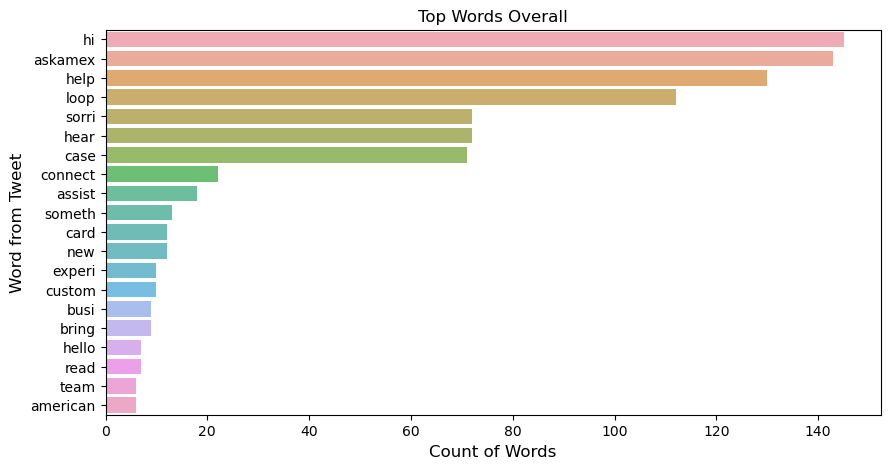

In [54]:
df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()